In [1]:
import sys
sys.prefix

'/home/rick/anaconda2/envs/gis'

In [ ]:
make notebook of steps to get to here for SMU

# Compare [NARS](https://www.epa.gov/national-aquatic-resource-surveys) water quality data with [StreamCat](https://www.epa.gov/national-aquatic-resource-surveys/streamcat) summarizations for NO3

## [Trends in Nitrate Drinking Water Violations Across the US](https://cfpub.epa.gov/si/si_public_record_report.cfm?dirEntryId=337186&simpleSearch=1&searchAll=water)

_Under the [Safe and Sustainable Water Resources Research Program](https://www.epa.gov/aboutepa/about-safe-and-sustainable-water-resources-research-program), EPA scientists are examining the temporal and spatial patterns of drinking water nitrate violations across the United States. Excess nitrate in drinking water has been a human health concern since the middle of the 20th century. Since 1979, public drinking water suppliers have been required to regularly monitor nitrate levels and EPA is notified when a public water system violates the 10 mg nitrate-N L-1 maximum contaminant level (MCL)._ **The study found an increase in the number and proportion of systems in violation for nitrate over time, nearly doubling from 280 to 527 systems from 1994 to 2010. This analysis identifies specific systems or locations that consistently experience violations of the nitrate MCL or where there are higher populations served by systems in violations, which can then inform management strategies. Currently, it is not fully known what is causing this increase in nitrate violations in drinking water supplies. This analysis, along with future research on the underlying factors driving the violations, may inform decisions on how treatment, source water protection, and other management options could best protect drinking water from nitrate contamination.** _The results of this study could be important for a number of programs within EPA’s Office of Groundwater and Drinking Water, Regions, and States. This abstract contributes to SSWR4.03C and SSWR3.01B._


this notebook uses data from the National Aquatic Resource Survey and watershed level summarizations of nitrate violations?? to see if there is a visual correlation between these sources using the __folium__ package in python. The steps below demonstrate how this analysis was done to link and visualize geographic data

U.S. Environmental Protection Agency. 2010. National Aquatic Resource Surveys. National Lakes Assessment 2007 (data and metadata files). Available from U.S. EPA website: http://www.epa.gov/national-aquatic-resource-surveys/data-national-aquatic-resource-surveys. Date accessed: YYYY-MM-DD.


*SMU_workshop*
start w/ catchments, full
get centroids
plot
get NARS data
make shp from  csv
heatmap from NARS of NO3

plot together with mike's catchment summarizations

2 NBs one that shows the analysis, the other steps through it
    * analysis just shows folium output along with explanations
    * steps NB shows:
        * DL NARS all
        * print tables ( cmd line )
        * access to envs through User local, 
CREATE --
    instruction in Anacona NB on Anaconda 

#! DL github repo -- extract/navigate cmd to there

SETUP --
    DL Anaconda -- use curl??
    install -- figure commands  for install
    
RUN --
    conda info -- ?? where does conda envs install -- python version 2.7.12.final.0!
    conda add channel ioos
    conda create -n gis jupyter geopandas folium spyder
    ####### should prompt for Y, hit enter
    activate gis
#! LEAVE WINDOWS OPEN
BEGIN --
    show abspath in cell -- explain how relativ/abs differ
    DL NARS data -- extract inside 2018_GIS_workshop
   
   

# SETUP --


### Download [Anaconda](https://www.anaconda.com/download)

### Download [2018_GIS_workshop](https://github.com/debboutr/2018_GIS_workshop)

** steps for anaconda install **

DL [NARS data]() do Ctrl + F here a search for 'all' then arrow down to:
    
   **| Survey | Indicator | Data | Metadata |**
   
   **| Streams 2004-2005 | All | WSA All Data (ZIP)(1 pg, 7 MB) | |**
   
### click the '.zip' link for a folder of all tables

### open spyder w/ 'super' key  #! navigate to 
### open in cmd w/ spyder --new-instance


print tree of local dir

#### Examine NARS table data

In [27]:
import os
folder = 'wsamarch2_2009'
for f in os.listdir('./%s' % folder):  # loop through every file in a given directory
    if f.split('.')[-1] == 'csv':  # find only CSV's
#         print '*************************'
#         print f
        if f.split('.')[0] == 'wsa_siteinfo_ts_final':  # load NARS site info into a pandas DataFrame
            tbl = pd.read_csv('{}/{}'.format(folder,f))

In [19]:
pd.options.display.max_columns # what is this otherwise? default -- 20 

20

In [ ]:
# pd.options.display.max_columns = None  # this can be used to display more columns than default
tbl
# tbl.columns

In [31]:
chem = pd.read_csv('./wsamarch2_2009/waterchemistry.csv')
print chem.columns #.tolist()

Index([u'SITE_ID', u'YEAR', u'VISIT_NO', u'SAMPLED', u'DATE_COL', u'DATECHEM',
       u'TEAM_ID', u'SAMP_LOC', u'PHSTVL', u'PHSTVLF', u'COND', u'CONDF',
       u'ANC', u'ANCF', u'TURB', u'TURBF', u'TSS', u'TSSF', u'COLOR',
       u'COLORF', u'DOC', u'DOCF', u'DIC', u'DICF', u'PTL', u'PTLF', u'SE',
       u'SEF', u'CA', u'CAF', u'MG', u'MGF', u'NA', u'NAF', u'K', u'KF',
       u'NH4', u'NH4F', u'SO4', u'SO4F', u'NO3', u'NO3F', u'CL', u'CLF',
       u'NTL', u'NTLF', u'ZN', u'ZNF', u'SIO2', u'SIO2F', u'H', u'OH', u'HCO3',
       u'CO3', u'ALKCALC', u'CATSUM', u'ANSUM', u'ANDEF', u'SOBC', u'IONSTR',
       u'BALANCE', u'ORGION', u'CONCAL', u'CONDHO', u'DAY_SHIP', u'COM_LAB',
       u'COM_FLD', u'COM_IM '],
      dtype='object')


In [48]:
chem.DATE_COL.equals(tbl.DATE_COL) # dates don't match up between site visits for different tables???

False

In [54]:
pd.options.display.max_rows

60

In [140]:
pd.options.display.max_rows = 47
chem = chem [['SITE_ID','NO3', 'NH4', 'NTL']]
tbl.drop_duplicates('SITE_ID', inplace=True)
g = pd.merge(tbl, chem, on='SITE_ID')
display(g)

,SITE_ID,YEAR,VISIT_NO,SITENAME,SITETYPE,REPEAT,LON_DD,LAT_DD,XLON_DD,XLAT_DD,XCOORD_SOURCE,STRAHLER,ST_ORDER,DATE_COL,USED,SITESAMP,FLOWSITE,XSTATUS,VALXSTAT,EVALSTATUS,TNT,STRATUM,WGT_WSA,INDXVIS_EXTENT,SAMPCHEM,INDXVIS_CHEM,INDEXYR_CHEM,INDEXVIS_CHEM,SAMPBENT,INDEX_SAMPTYPE,INDEXYR_BENT,INDEXVIS_BENT,INDXVIS_BENT,SAMPPHAB,INDXVIS_PHAB,INDEXYR_PHAB,INDEXVIS_PHAB,STATE,STATE_NM,COUNTY,EPAREGION,WESTEAST,RT_WSA,XELEV,WSAREA,ECO3,ECO3_NM,ECOWSA9,ECOWSA3,NAECO3,NAECO2,NAECO2_NM,NAECO1,ECOREPORT,HUC2,HUC4,HUC6,HUC8,HUC8_NM,IM_FLAG,IM_COMMENT,NO3,NH4,NTL
0,IAW02344-0096,2004,1,BEAVER BRANCH,EASTPROB,Y,-94.089731,41.950878,-94.08996,41.95086,GPS,2,2nd,06/14/2004,Y,Y,WADEABLE,SAMPLEABLE,WADEABLE,TS,T,IA,1063.791335,YES,,YES,2004,1,YES,REACHWIDE,2004,1,YES,,YES,2004,1,IA,IOWA,BOONE,REGION__7,EAST,T,296,38.79,47,WESTERN CORN BELT PLAINS,TPL,PLNLOW,9.2.3,9.2,TEMPERATE PRAIRIES,9,TEMPERATE PRAIRIES,7,710,71000,7100004,MIDDLE DES MOINES,,,1554.6,1.5,23300
1,IAW02344-0097,2004,1,WEST NISHNABOTNA RIVER,EASTPROB,Y,-95.400885,41.332723,-95.40079,41.33257,GPS,5,5th +,07/29/2004,Y,Y,WADEABLE,SAMPLEABLE,WADEABLE,TS,T,IA,270.983997,YES,,YES,2004,1,YES,REACHWIDE,2004,1,YES,,YES,2004,1,IA,IOWA,POTTAWATTAMIE,REGION__7,EAST,T,327,1630.16,47,WESTERN CORN BELT PLAINS,TPL,PLNLOW,9.2.3,9.2,TEMPERATE PRAIRIES,9,TEMPERATE PRAIRIES,10,1024,102400,10240002,WEST NISHNABOTNA,,,595.2,0.7,8644
2,IAW02344-0098,2004,1,UNN TRIB. OTTER CREEK,EASTPROB,Y,-91.922940,42.702540,-91.92313,42.70254,GPS,3,3rd,07/21/2004,Y,Y,WADEABLE,SAMPLEABLE,WADEABLE,TS,T,IA,1450.089545,YES,,YES,2004,1,YES,REACHWIDE,2004,1,YES,,YES,2004,1,IA,IOWA,FAYETTE,REGION__7,EAST,S,316,32.99,47,WESTERN CORN BELT PLAINS,TPL,PLNLOW,9.2.3,9.2,TEMPERATE PRAIRIES,9,TEMPERATE PRAIRIES,7,708,70801,7080102,UPPER WAPSIPINICON,,,663.2,4.4,9838
3,IAW02344-0099,2004,1,LIZARD CREEK,EASTPROB,Y,-94.339160,42.537422,-94.33945,42.53732,GPS,4,4th,08/16/2004,Y,Y,WADEABLE,SAMPLEABLE,WADEABLE,TS,T,IA,346.5118524,YES,,YES,2004,1,YES,REACHWIDE,2004,1,YES,,YES,2004,1,IA,IOWA,WEBSTER,REGION__7,EAST,R,329,651.31,47,WESTERN CORN BELT PLAINS,TPL,PLNLOW,9.2.3,9.2,TEMPERATE PRAIRIES,9,TEMPERATE PRAIRIES,7,710,71000,7100004,MIDDLE DES MOINES,,,132.4,1.7,2214
4,IAW02344-0100,2004,1,BELL CREEK,EASTPROB,,-91.672783,42.979807,-91.67287,42.97979,GPS,2,2nd,07/20/2004,Y,Y,WADEABLE,SAMPLEABLE,WADEABLE,TS,T,IA,144.7919423,YES,,YES,2004,1,YES,REACHWIDE,2004,1,YES,,YES,2004,1,IA,IOWA,FAYETTE,REGION__7,EAST,T,263,18.04,52,DRIFTLESS AREA,UMW,PLNLOW,8.1.5,8.1,MIXED WOOD PLAINS,8,MIXED WOOD PLAINS,7,706,70600,7060004,TURKEY,,,348.9,0.9,5288
5,IAW02344-0102,2004,1,WAPSIPINICON,EASTPROB,,-92.379581,42.993331,-92.37999,42.99298,GPS,4,4th,10/07/2004,Y,Y,WADEABLE,SAMPLEABLE,WADEABLE,TS,T,IA,472.3419108,YES,,YES,2004,1,YES,REACHWIDE,2004,1,YES,,YES,2004,1,IA,IOWA,CHICKASAW,REGION__7,EAST,S,320,421.3,47,WESTERN CORN BELT PLAINS,TPL,PLNLOW,9.2.3,9.2,TEMPERATE PRAIRIES,9,TEMPERATE PRAIRIES,7,708,70801,7080102,UPPER WAPSIPINICON,,,433.6,1.1,6250
6,IAW02344-0103,2004,1,DRY CREEK,EASTPROB,,-96.409910,43.079063,-96.4101,43.07906,GPS,3,3rd,06/22/2004,Y,Y,WADEABLE,SAMPLEABLE,WADEABLE,TS,T,IA,748.6864551,YES,,YES,2004,1,YES,REACHWIDE,2004,1,YES,,YES,2004,1,IA,IOWA,SIOUX,REGION__7,EAST,S,384,93.12,47,WESTERN CORN BELT PLAINS,TPL,PLNLOW,9.2.3,9.2,TEMPERATE PRAIRIES,9,TEMPERATE PRAIRIES,10,1017,101702,10170203,LOWER BIG SIOUX,,,75.4,2.5,1938
7,IAW02344-0104,2004,1,BATTLE CREEK,EASTPROB,,-95.541019,42.446393,-95.54136,42.44633,GPS,2,2nd,07/08/2004,Y,Y,WADEABLE,SAMPLEABLE,WADEABLE,TS,T,IA,748.6864551,YES,,YES,2004,1,YES,REACHWIDE,2004,1,YES,,YES,2004,1,IA,IOWA,IDA,REGION__7,EAST,T,399,13.51,47,WESTERN CORN BELT PLAINS,TPL,PLNLOW,9.2.3,9.2,TEMPERATE PRAIRIES,9,TEMPERATE PRAIRIES,10,1023,102300,10230005,MAPLE,,,1160.6,1.1,16588
8,IAW02344-0105,2004,1,MOSQUITO CREEK,EASTPROB,,-95.688846,41.367449,-95.68917,41.36755,GPS,4,4th,06/30/2004,Y,Y,PARTIAL WADEABLE,SAMPLEABLE,PARBYWADE,TS,T,IA,411.8420757,YES,,YES,2004,1,YES,REACHWIDE,2004,1,YES,,YES,2004,1,IA,IOWA,POTTAWATTA

In [67]:
print len(tbl)
print len(chem)
print len(g)

1842
1392
1392


In [56]:
len(chem.SITE_ID.unique())

1392

In [57]:
len(tbl.SITE_ID.unique()) # extract unique SITE_IDs!!

1842

In [76]:
g.plot??

<IPython.core.display.Javascript object>


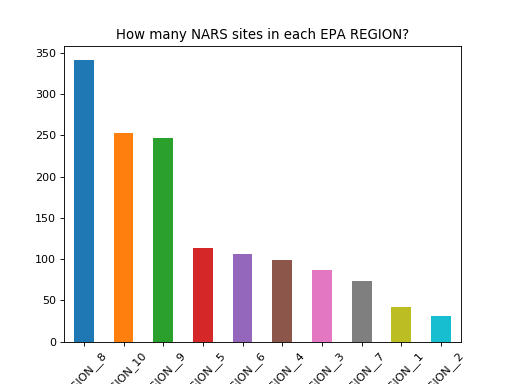

In [86]:
%matplotlib notebook 
g['EPAREGION'].value_counts().plot(kind='bar', title="How many NARS sites in each EPA REGION?", rot= 47)

#### What is an [EPA REGION](https://www.epa.gov/aboutepa/visiting-regional-office)??

In [ ]:

#shouldn't be needed
inProj = Proj(init='epsg:2226', preserve_units = True)
outProj = Proj(init='epsg:4326')

In [102]:
g.head()

,SITE_ID,YEAR,VISIT_NO,SITENAME,SITETYPE,REPEAT,LON_DD,LAT_DD,XLON_DD,XLAT_DD,XCOORD_SOURCE,STRAHLER,ST_ORDER,DATE_COL,USED,SITESAMP,FLOWSITE,XSTATUS,VALXSTAT,EVALSTATUS,TNT,STRATUM,WGT_WSA,INDXVIS_EXTENT,SAMPCHEM,INDXVIS_CHEM,INDEXYR_CHEM,INDEXVIS_CHEM,SAMPBENT,INDEX_SAMPTYPE,INDEXYR_BENT,INDEXVIS_BENT,INDXVIS_BENT,SAMPPHAB,INDXVIS_PHAB,INDEXYR_PHAB,INDEXVIS_PHAB,STATE,STATE_NM,COUNTY,EPAREGION,WESTEAST,RT_WSA,XELEV,WSAREA,ECO3,ECO3_NM,ECOWSA9,ECOWSA3,NAECO3,NAECO2,NAECO2_NM,NAECO1,ECOREPORT,HUC2,HUC4,HUC6,HUC8,HUC8_NM,IM_FLAG,IM_COMMENT,NO3,NO3F,geometry
0,IAW02344-0096,2004,1,BEAVER BRANCH,EASTPROB,Y,-94.089731,41.950878,-94.08996,41.95086,GPS,2,2nd,06/14/2004,Y,Y,WADEABLE,SAMPLEABLE,WADEABLE,TS,T,IA,1063.791335,YES,,YES,2004,1,YES,REACHWIDE,2004,1,YES,,YES,2004,1,IA,IOWA,BOONE,REGION__7,EAST,T,296,38.79,47,WESTERN CORN BELT PLAINS,TPL,PLNLOW,9.2.3,9.2,TEMPERATE PRAIRIES,9,TEMPERATE PRAIRIES,7,710,71000,7100004,MIDDLE DES MOINES,,,1554.6,H69,POINT (-94.089731 41.950878)
1,IAW02344-0097,2004,1,WEST NISHNABOTNA RIVER,EASTPROB,Y,-95.400885,41.332723,-95.40079,41.33257,GPS,5,5th +,07/29/2004,Y,Y,WADEABLE,SAMPLEABLE,WADEABLE,TS,T,IA,270.983997,YES,,YES,2004,1,YES,REACHWIDE,2004,1,YES,,YES,2004,1,IA,IOWA,POTTAWATTAMIE,REGION__7,EAST,T,327,1630.16,47,WESTERN CORN BELT PLAINS,TPL,PLNLOW,9.2.3,9.2,TEMPERATE PRAIRIES,9,TEMPERATE PRAIRIES,10,1024,102400,10240002,WEST NISHNABOTNA,,,595.2,,POINT (-95.400885 41.332723)
2,IAW02344-0098,2004,1,UNN TRIB. OTTER CREEK,EASTPROB,Y,-91.922940,42.702540,-91.92313,42.70254,GPS,3,3rd,07/21/2004,Y,Y,WADEABLE,SAMPLEABLE,WADEABLE,TS,T,IA,1450.089545,YES,,YES,2004,1,YES,REACHWIDE,2004,1,YES,,YES,2004,1,IA,IOWA,FAYETTE,REGION__7,EAST,S,316,32.99,47,WESTERN CORN BELT PLAINS,TPL,PLNLOW,9.2.3,9.2,TEMPERATE PRAIRIES,9,TEMPERATE PRAIRIES,7,708,70801,7080102,UPPER WAPSIPINICON,,,663.2,H13,POINT (-91.92294 42.70254)
3,IAW02344-0099,2004,1,LIZARD CREEK,EASTPROB,Y,-94.339160,42.537422,-94.33945,42.53732,GPS,4,4th,08/16/2004,Y,Y,WADEABLE,SAMPLEABLE,WADEABLE,TS,T,IA,346.5118524,YES,,YES,2004,1,YES,REACHWIDE,2004,1,YES,,YES,2004,1,IA,IOWA,WEBSTER,REGION__7,EAST,R,329,651.31,47,WESTERN CORN BELT PLAINS,TPL,PLNLOW,9.2.3,9.2,TEMPERATE PRAIRIES,9,TEMPERATE PRAIRIES,7,710,71000,7100004,MIDDLE DES MOINES,,,132.4,,POINT (-94.33915999999999 42.537422)
4,IAW02344-0100,2004,1,BELL CREEK,EASTPROB,,-91.672783,42.979807,-91.67287,42.97979,GPS,2,2nd,07/20/2004,Y,Y,WADEABLE,SAMPLEABLE,WADEABLE,TS,T,IA,144.7919423,YES,,YES,2004,1,YES,REACHWIDE,2004,1,YES,,YES,2004,1,IA,IOWA,FAYETTE,REGION__7,EAST,T,263,18.04,52,DRIFTLESS AREA,UMW,PLNLOW,8.1.5,8.1,MIXED WOOD PLAINS,8,MIXED WOOD PLAINS,7,706,70600,7060004,TURKEY,,,348.9,,POINT (-91.672783 42.979807)


In [96]:
import geopandas as gpd
# gpd.GeoDataFrame.from_csv?

from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(g.LON_DD, g.LAT_DD)]
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(g, crs=crs, geometry=geometry)

In [100]:
print gdf.unary_union.bounds # Another way to get to the center of your data
extent = gdf.unary_union.bounds
lat_Center = (extent[1] + extent[3]) / 2
lon_Center = (extent[0] + extent[2]) / 2

(-124.59938999999999, 28.365737, -67.79674, 48.93314)


In [104]:
g[['LON_DD','LAT_DD']].head(47)

,LON_DD,LAT_DD
0,-94.089731,41.950878
1,-95.400885,41.332723
2,-91.922940,42.702540
3,-94.339160,42.537422
4,-91.672783,42.979807
5,-92.379581,42.993331
6,-96.409910,43.079063
7,-95.541019,42.446393
8,-95.688846,41.367449
9,-95.204582,40.828811


In [177]:

#     fg.add_child(folium.Marker(location=[lat,lon],popup=folium.Popup(iframe),
#                                    icon=folium.Icon(icon_color='white', color=color(pct)[0], icon=color(pct)[1])))



# location=[38.58, -121.5]
nars_map = folium.Map(location=[lat_Center, lon_Center], 
                        tiles      = ("https://api.mapbox.com/styles/v1/mapbox/"
                                       "streets-v10/tiles/256/{z}/{x}/{y}?access_token="
                                       "pk.eyJ1IjoiZGFyYW9iZWlybmUiLCJhIjoidlV2WXZKRSJ9.EwVOY6b8UeyIz3N2UAu5pw"),
                        zoom_start = 4,
                        attr       = '© Mapbox')
marker_cluster = folium.MarkerCluster().add_to(nars_map)
# coords_list = []

for name, row in g.ix[:47].iterrows():   
    x, y = row['LON_DD'],row['LAT_DD']
#     converts each set coordinates from state plane to lat/long
#     long, lat = transform(inProj,outProj,x1,y1)
#     coords = (x,y)
#     #add the set of coordinates to the list
#     coords_list.append(coords)
#     html="""
#     <h4 style="background-color:powderblue; text-align:center;">SITE_ID: %s</h4>
#     <p>Nitrate (ueq/L): <b>%s</b></p>

    html="""
        <style>
            h4 { 
              color: white;
              background-color: #303030;
              text-align:center;
              margin-bottom:0;
            }
            table {
              border: "1";
              margin: 0px auto;
              width: 283px;
            }
            tr {
              background-color:grey;
              text-align: center;
            }
            .nitrate {
              background-color:yellow;
            }             
        </style>
        <h4>SITE_ID: %s</h4>
        <table>
          <tr class="nitrate">
              <td>Nitrate (ueq/L): </td>
              <td>%s</td>
          </tr>
          <tr>
              <td>Ammonium (ueq/L): </td>
              <td>%s</td>
          </tr>          
          <tr>
              <td>Total Nitrogen (ug/L): </td>
              <td>%s</td>
          </tr>      
        </table>
    """ % (row.SITE_ID, row.NO3, row.NH4, row.NTL)
    
    
    iframe = folium.element.IFrame(html=html, width=300, height=120)
    folium.Marker([y, x], popup=folium.Popup(iframe)).add_to(marker_cluster)

#saves callsnew.html in the working directory
#calls_map.save('callsnew.html')
nars_map

In [178]:
g.columns

Index([u'SITE_ID', u'YEAR', u'VISIT_NO', u'SITENAME', u'SITETYPE', u'REPEAT',
       u'LON_DD', u'LAT_DD', u'XLON_DD', u'XLAT_DD', u'XCOORD_SOURCE',
       u'STRAHLER', u'ST_ORDER', u'DATE_COL', u'USED', u'SITESAMP',
       u'FLOWSITE', u'XSTATUS', u'VALXSTAT', u'EVALSTATUS', u'TNT', u'STRATUM',
       u'WGT_WSA', u'INDXVIS_EXTENT', u'SAMPCHEM', u'INDXVIS_CHEM',
       u'INDEXYR_CHEM', u'INDEXVIS_CHEM', u'SAMPBENT', u'INDEX_SAMPTYPE',
       u'INDEXYR_BENT', u'INDEXVIS_BENT', u'INDXVIS_BENT', u'SAMPPHAB',
       u'INDXVIS_PHAB', u'INDEXYR_PHAB', u'INDEXVIS_PHAB', u'STATE',
       u'STATE_NM', u'COUNTY', u'EPAREGION', u'WESTEAST', u'RT_WSA', u'XELEV',
       u'WSAREA', u'ECO3', u'ECO3_NM', u'ECOWSA9', u'ECOWSA3', u'NAECO3',
       u'NAECO2', u'NAECO2_NM', u'NAECO1', u'ECOREPORT', u'HUC2', u'HUC4',
       u'HUC6', u'HUC8', u'HUC8_NM', u'IM_FLAG', u'IM_COMMENT ', u'NO3',
       u'NH4', u'NTL'],
      dtype='object')

In [180]:
coords_list = [[row.LAT_DD, row.LON_DD, row.NO3] for _, row in g.iterrows()]

In [193]:
nars_heatmap = folium.Map(location=[lat_Center, lon_Center], tiles='Stamen Toner', zoom_start=4)

#create a heatmap using the same data as above
nars_heatmap.add_child(plugins.HeatMap([[item[0], item[1], item[2]] for item in coords_list],radius=15))
#calls_heatmap.save("heatmap.html")
display(nars_heatmap)

In [187]:
plugins.HeatMap?

In [194]:
display?

In [195]:
folium.GeoJson?
# style_function: function, default None
#     A function mapping a GeoJson Feature to a style dict


In [35]:
#! ( Ctl + mouse wheel ) for zoom in NB waterchemistry.csv
#! slicing data is something you will have to do a lot of
#! | operator then .isin([])

for f in os.listdir('./%s' % folder):
    if f.split('.')[-1] == 'csv':
        print '*************************'
        print f
        tbl = pd.read_csv('{}/{}'.format(folder,f))
        for col in tbl.columns.tolist():
            print col

*************************
mesosubstrate.csv
SITE_ID
YEAR
VISIT_NO
TRANSECT
DATE_COL
TEAM_ID
SUB_5_7
XSUB_LFT
XSUBLCTR
XSUB_CTR
XSUBRCTR
XSUB_RGT
COM_FLDF 
*************************
wsa_bencnt_genus_ts_final_part2.csv
SITE_ID
YEAR
VISIT_NO
INDEX_SAMPTYPE
PHYLUM
CLASS
ORDER
FAMILY
GENUS
ABUND
DISTINCT
HABIT
PTV
FLAG_PTV
FFG 
*************************
waterchemistry.csv
SITE_ID
YEAR
VISIT_NO
SAMPLED
DATE_COL
DATECHEM
TEAM_ID
SAMP_LOC
PHSTVL
PHSTVLF
COND
CONDF
ANC
ANCF
TURB
TURBF
TSS
TSSF
COLOR
COLORF
DOC
DOCF
DIC
DICF
PTL
PTLF
SE
SEF
CA
CAF
MG
MGF
NA
NAF
K
KF
NH4
NH4F
SO4
SO4F
NO3
NO3F
CL
CLF
NTL
NTLF
ZN
ZNF
SIO2
SIO2F
H
OH
HCO3
CO3
ALKCALC
CATSUM
ANSUM
ANDEF
SOBC
IONSTR
BALANCE
ORGION
CONCAL
CONDHO
DAY_SHIP
COM_LAB
COM_FLD
COM_IM 
*************************
bankgeometry.csv


/home/rick/anaconda2/envs/gis/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SITE_ID
YEAR
VISIT_NO
TRANSECT
TRANSDIR
DATE_COL
TEAM_ID
DIST_LB
DEPTH
SIZE_CLS
EMBED
COM_FLDF
ANGLE
UNDERCUT
WT_WID
WT_WID_F
BARWID
BARWID_F
BANKWID
BANKWD_F
BANKHT
BANKHT_F
INCISED
INCIS_F
INCISEDF
BANKWIDF
FLAG_BNK
FLAG_SUB
BARYES 
*************************
fieldchemistry.csv
SITE_ID
VISIT_NO
DATE_COL
SAMPLED
COM_IM
STAT_ID
QCCSCOND
COM_QCCS
STRMCOND
COM_COND
STRM_DO
COM_DO
STRMTEMP
COM_TEMP
TIME_COM
TEAM_ID
NAME_1
BIOMOR1
GEOMOR1
FORMS1
NAME_2
BIOMOR2
GEOMOR2
FORMS2
NAME_3
BIOMOR3
GEOMOR3
FORMS3
NAME_4
BIOMOR4
GEOMOR4
FORMS4
NAME_5
BIOMOR5
GEOMOR5
FORMS5
NAME_6
NAME_7
NAME_8
COM_CREW
TIME
YEAR 
*************************
rapidhabmetrics.csv
SITE_ID
YEAR
VISIT_NO
FLOWTYPE
DATE_COL
TEAM_ID
EPIF_SUB
POOL_SUB
POOL_VAR
SEDI_DEP
CHAN_FLS
CHAN_ALT
CHAN_SIN
BANK_STL
BANK_STR
VEG_PROL
VEG_PROR
RIPA_VL
RIPA_VR
EMBEDDED
VELOCITY
FRQ_RIFF
FORMTYPE
SAMPTYPE
TRANSECT
RH_SUM
RH_XHAB 
*************************
channelconstraint.csv
SITE_ID
YEAR
VISIT_NO
DATE_COL
TEAM_ID
CHAN_CON
PERCENT
BANKFULL
VA

WETSDSL
WETSDML
WETSDLL
DRYSDSL
DRYSDML
DRYSDLL
WETMDSL
WETMDML
WETMDLL
DRYMDSL
DRYMDML
DRYMDLL
WETLDSL
WETLDML
WETLDLL
DRYLDSL
DRYLDML
DRYLDLL
WETXDSL
WETXDML
WETXDLL
DRYXDSL
DRYXDML
DRYXDLL
COM_FLDF 
*************************
verification.csv
SITE_ID
YEAR
VISIT_NO
LOC_NAME
DATE_COL
TEAM_ID
XSTATUS
VALXSTAT
SITESAMP
MLAT_DD
MLON_DD
XLAT_DD
XLON_DD
MLAT_DEG
MLAT_MIN
MLAT_SEC
MLON_DEG
MLON_MIN
MLON_SEC
XLAT_DEG
XLAT_MIN
XLAT_SEC
XLON_DEG
XLON_MIN
XLON_SEC
XDIMEN
XGPSCOOR
VER_STAT
GPS_VER
LOC_VER
SIG_VER
RDS_VER
TOP_VER
OTH_VER
RCHWIDTH
RCHUP
RCHDOWN
RCHLEN
COM_IM
STATE
TRCHLEN
XLONDD 
*************************
thalweg_part2.csv
SITE_ID
YEAR
VISIT_NO
TRANSECT
STA_NUM
DATE_COL
TEAM_ID
INCREMNT
REACHLEN
DEPTH
WT_WID
BARYES
BARWID
SEDIMENT
CHANUNIT
POOLFORM
SIDECHAN
COM_FLDF
SB_COM_F
BACKWATR
METHOD
UNITS
SLOPE1
SLOPET
SLOPE2
SLOPE3
SLOPE4
SLOPE5
SLOPE6
BEAR1
BEART
BEAR2
BEAR3
BEAR4
BEAR5
BEAR6
PROPORT1
PROPORTT
PROPORT2
PROPORT3
PROPORT4
PROPORT5
PROPORT6
DIST1
DISTT
DIST2
CALCINCREMNT 
**

In [4]:
from IPython.core.display import display, HTML
display(HTML('<h1 align="center">Compare <a href="">NARS</a> water quality data with <a href="">StreamCat</a> summarizations for NO3</h1>'))

In [2]:
import requests
import matplotlib.pyplot as py_plot
import pandas as pd
from IPython.display import display, HTML
from pyproj import Proj, transform
import folium
from folium import plugins
import math

#url from api explorer tab in open data platform
api_url = 'https://services5.arcgis.com/54falWtcpty3V47Z/arcgis/rest/services/cad_calls_year3/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json'

#function to return a list of column headers and rows of data from the json api call
def opendata_api(api_call):
    n = 0
    #build empty list for all data
    all_data = []
    #get a count of total records in api request
    call_count = requests.get(api_call,"&returnCountOnly=true").json()
    count = call_count['count']
    #calculate number of requests to make due to 1000 max record count
    loop_count = int(math.ceil(count/1000))

    for count in range(loop_count):
        call_json = requests.get(api_call,'&resultOffset='+str(n)).json()
        
        #build a list of dictionaries by getting the values of the features key
        calls_feats = call_json["features"]
        #loop to get the values of the attributes dictionary
        for line in calls_feats:
            all_data.append(line["attributes"])
        n+=1000
        #print("Number of requests is ", count)
    
    #return the keys of the first dictionary get column names
    fields = list(all_data[0].keys())

    #a list comprehension to populate a list of attributes into the list we are building called rows
    rows = [list(item.values()) for item in all_data]
    return rows,fields

make_request = opendata_api(api_url)
data = make_request[0]
columns = make_request[1]

print(columns)


[u'Received_Time', u'Dispatch_Date', u'Unit_ID', u'Location', u'Record_ID', u'Description', u'Beat', u'Reporting_Officer', u'Day_of_Week', u'Grid', u'Received_Date', u'Clear_Date', u'Report_Created', u'Police_District', u'Occurence_Time', u'OBJECTID', u'Y_Coordinate', u'Clear_Time', u'At_Scene_Date', u'At_Scene_Time', u'Enroute_Date', u'Call_Type', u'X_Coordinate', u'Enroute_Time', u'Occurence_Date', u'Dispatch_Time']


In [3]:
#print the first 5 records of data      
print(data[0:5])

[[u'22:15:12', 1514793600000, u'1C15', u'3430 WINTER PARK DR', u'6817842', u'SHOTS FIRED - LESS THAN 15 AGO', u'1B', u'0957', u'Mon', u'0401', 1514793600000, 1514793600000, u'N', u'1', u'22:15:12', 1, 1991748, u'22:34:13', 1514793600000, u'22:29:50', 1514793600000, u'927S', 6703388, u'22:23:55', 1514793600000, u'22:23:55'], [u'15:36:50', -2240496420000, u'', u'5 YACABUCCI CT', u'6817554', u'ALL UNITS BROADCAST', u'2B', u'', u'Mon', u'0564', 1514793600000, 1514793600000, u'N', u'2', u'15:36:50', 2, 1987124, u'15:40:11', -2240496420000, u'        ', -2240496420000, u'AU', 6722675, u'        ', 1514793600000, u'        '], [u'14:16:06', 1514793600000, u'BIK2', u'110 K ST', u'6817555', u'DISTURBANCE-CLARIFY', u'3M', u'297', u'Mon', u'0741', 1514793600000, -2240496420000, u'N', u'3', u'14:16:06', 3, 1974123, u'        ', 1514793600000, u'15:13:08', 1514793600000, u'415', 6703016, u'15:08:17', 1514793600000, u'15:08:17'], [u'07:34:21', -2240496420000, u'', u'3701 FRANKLIN BLVD', u'6817237', 

In [4]:
#building a pandas dataframe called "calls"
calls = pd.DataFrame.from_records(data, columns=columns)

#returns the counts for each unique value in the "Description" field
display(calls['Description'].value_counts())

DISTURBANCE-CLARIFY                                  5339
TRAFFIC STOP                                         4791
SUSPICIOUS SUBJECT/CIRCUMSTANCE-IN PROGRESS          3153
SUSPICIOUS VEHICLE-OCCUPIED                          2655
ALL UNITS BROADCAST                                  2575
WELFARE CHECK                                        2251
SUBJECT STOP                                         2157
INCOMPLETE CALL FOR POLICE                           1745
REPORT NUMBER ASSIGNMENT                              978
ALARM-SECURE NO EVID OF CRIME                         882
BUSINESS CHECK                                        868
ERRAND                                                833
MISDEMEANOR ASSAULT-IN PROGRESS                       826
PARK CHECK                                            777
VEHICLE ACCIDENT-NO OR UNKNOWN INJURIES               709
ALARM-CANCEL                                          630
CHECK ON HAZARD                                       611
DISTURBANCE-FA

In [5]:
#describe method on the "description" field
calls['Description'].describe()

count                   45000
unique                    179
top       DISTURBANCE-CLARIFY
freq                     5339
Name: Description, dtype: object

In [6]:
#using the display() function to view calls dataframe as a table
display(calls.head())

,Received_Time,Dispatch_Date,Unit_ID,Location,Record_ID,Description,Beat,Reporting_Officer,Day_of_Week,Grid,...,Y_Coordinate,Clear_Time,At_Scene_Date,At_Scene_Time,Enroute_Date,Call_Type,X_Coordinate,Enroute_Time,Occurence_Date,Dispatch_Time
0,22:15:12,1514793600000,1C15,3430 WINTER PARK DR,6817842,SHOTS FIRED - LESS THAN 15 AGO,1B,0957,Mon,0401,...,1991748,22:34:13,1514793600000,22:29:50,1514793600000,927S,6703388,22:23:55,1514793600000,22:23:55
1,15:36:50,-2240496420000,,5 YACABUCCI CT,6817554,ALL UNITS BROADCAST,2B,,Mon,0564,...,1987124,15:40:11,-2240496420000,,-2240496420000,AU,6722675,,1514793600000,
2,14:16:06,1514793600000,BIK2,110 K ST,6817555,DISTURBANCE-CLARIFY,3M,297,Mon,0741,...,1974123,,1514793600000,15:13:08,1514793600000,415,6703016,15:08:17,1514793600000,15:08:17
3,07:34:21,-2240496420000,,3701 FRANKLIN BLVD,6817237,INCOMPLETE CALL-PAY PHONE,4B,,Mon,0958,...,1959222,07:35:49,-2240496420000,,-2240496420000,952PP,6711727,,1514793600000,
4,10:58:04,1514793600000,1B27,999 NORTH AVE,6817367,INCOMPLETE CALL FOR POLICE,2A,0965,Mon,0503,...,1995679,11:14:47,1514793600000,11:05:34,1514793600000,952,6720364,11:02:57,1514793600000,11:02:45


In [7]:
#count of incidents by day of week
calls['Day_of_Week'].value_counts()

Fri    6964
Thu    6788
Wed    6698
Tue    6544
Sat    6474
Mon    5850
Sun    5682
Name: Day_of_Week, dtype: int64

In [8]:
#convert x,y coords to float data type if they are string or int
def parse_float(x):
    try:
        x = float(x)
    except Exception:
        x = 0
    return x
calls['X_Coordinate'] = calls['X_Coordinate'].apply(parse_float)
calls['Y_Coordinate'] = calls['Y_Coordinate'].apply(parse_float)

In [10]:
#create a variable that contains only accident Vehicle Reports from "Description" field
accident = calls[calls['Description'] == 'VEHICLE ACCIDENT-INJURIES']

display(accident[0:5])

print len(calls)
print len(accident)

,Received_Time,Dispatch_Date,Unit_ID,Location,Record_ID,Description,Beat,Reporting_Officer,Day_of_Week,Grid,...,Y_Coordinate,Clear_Time,At_Scene_Date,At_Scene_Time,Enroute_Date,Call_Type,X_Coordinate,Enroute_Time,Occurence_Date,Dispatch_Time
901,12:57:01,1514880000000,1B62,FRUITRIDGE RD / SAMPSON BLVD,6818498,VEHICLE ACCIDENT-INJURIES,6B,1032,Tue,1084,...,1953464.0,13:06:25,-2240496420000,,1514880000000,901A,6719182.0,12:59:12,1514880000000,12:58:59
1242,21:50:27,1514880000000,1C18,NORTHGATE BLVD / TANDY DR,6819046,VEHICLE ACCIDENT-INJURIES,1C,0425,Tue,0309,...,1996876.0,22:25:12,1514880000000,21:59:08,1514880000000,901A,6711160.0,21:52:47,1514880000000,21:52:24
1359,10:00:24,1514966400000,1B35,13TH ST / G ST,6819451,VEHICLE ACCIDENT-INJURIES,3A,538,Wed,0725,...,1974351.0,10:52:06,1514966400000,10:08:35,1514966400000,901A,6708085.0,10:04:20,1514966400000,10:04:11
1531,23:32:53,-2240496420000,,EXPOSITION BLVD / BUS 80 EB,6820338,VEHICLE ACCIDENT-INJURIES,2C,,Wed,0626,...,1979693.0,23:34:33,-2240496420000,,-2240496420000,901A,6720724.0,,1514966400000,
1670,23:24:03,-2240496420000,,E ST / 16TH ST,6820332,VEHICLE ACCIDENT-INJURIES,3B,,Wed,0716,...,1974769.0,23:24:47,-2240496420000,,-2240496420000,901A,6709496.0,,1514966400000,


In [11]:
g = calls['Day_of_Week'].value_counts()
g.plot?

<IPython.core.display.Javascript object>


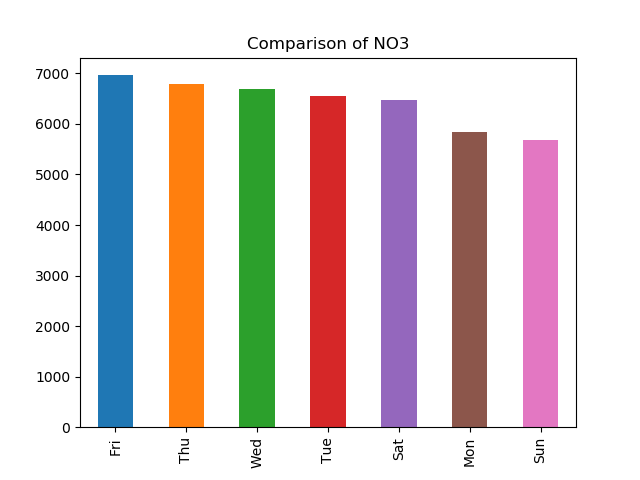

In [12]:
#using matplotlib magic to plot a bar chart of incidents by day of the week -- use with NO3!!
%matplotlib notebook  
# what is this?? special notebook pkg for notebook??
calls['Day_of_Week'].value_counts().plot(kind='bar', title="Comparison of NO3")  # NO3 val against EcoRegion/VPU/ maybe line graph? 
# NO3 in NARS vs. NO3 in catchments ??????????????????????????????????????????????????????????
# add figure title

In [13]:
#using the pyproj library to reproject x,y coordinates from state plane zone II to WGS84 lat/long
inProj = Proj(init='epsg:2226', preserve_units = True)
outProj = Proj(init='epsg:4326')
x1,y1 = 6722570,1992314
x2,y2 = transform(inProj,outProj,x1,y1)
print(x2,y2)

(-121.43672656313065, 38.63153998649104)


In [14]:
calls_map = folium.Map(location=[38.58, -121.5], tiles=("https://api.mapbox.com/styles/v1/mapbox/streets-v10/tiles/256/{z}/{x}/{y}?access_token=pk.eyJ1IjoiZGFyYW9iZWlybmUiLCJhIjoidlV2WXZKRSJ9.EwVOY6b8UeyIz3N2UAu5pw"),
           zoom_start=11,
          attr='Mapbox attribution')
marker_cluster = folium.MarkerCluster().add_to(calls_map)
coords_list = []
#to save on memory/time we only call the first 1,000 records to map
for name, row in accident.iloc[:1000].iterrows():   
    x1, y1 =row['X_Coordinate'],row['Y_Coordinate']
    #converts each set coordinates from state plane to lat/long
    long, lat = transform(inProj,outProj,x1,y1)
    coords = (lat,long)
    #add the set of coordinates to the list
    coords_list.append(coords)
    folium.Marker([lat, long], popup="Day of the week was " + row['Day_of_Week']).add_to(marker_cluster)

#saves callsnew.html in the working directory
#calls_map.save('callsnew.html')
calls_map

In [16]:
import os
os.getcwd()
# plugins.HeatMap?
#data : list of points of the form [lat, lng] or [lat, lng, weight]
#    The points you want to plot.
#    You can also provide a numpy.array of shape (n,2) or (n,3).

'/home/rick/projects/2018_GIS_workshop'

In [17]:
calls_heatmap = folium.Map(location=[38.58, -121.5], tiles='Stamen Toner', zoom_start=13)

#create a heatmap using the same data as above
calls_heatmap.add_child(plugins.HeatMap([[item[0], item[1]] for item in coords_list]))
#calls_heatmap.save("heatmap.html")
calls_heatmap

In [18]:
stamen_watercolor = folium.Map(location=[38.58, -121.5], tiles='Stamen WaterColor', zoom_start=13)
# stamen_watercolor.save("watermap.html")
stamen_watercolor